In [267]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [269]:
df = pd.read_csv('email.csv')

In [271]:
df = df[df['Category'].isin(['ham', 'spam'])]

In [273]:
df.duplicated().sum()

415

In [275]:
df.drop_duplicates(inplace=True)

In [277]:
df.reset_index(drop=True, inplace=True)

In [283]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [316]:
stop_words = set(stopwords.words('english'))

In [287]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer


In [289]:
wnl = WordNetLemmatizer()

In [291]:
# df['text'] = df['text'].apply(lambda x: wnl.lemmatize(str(x).lower()))
df['Message'] = df['Message'].apply(lambda x: wnl.lemmatize(str(x).lower()))
df['word_tk'] = df['Message'].apply(lambda x: word_tokenize(str(x)))
df['sent_tk'] = df['Message'].apply(lambda x: sent_tokenize(str(x)))

In [292]:
df

,Category,Message,word_tk,sent_tk
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...]
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar..."
...,...,...,...,...
5152,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...",[this is the 2nd time we have tried 2 contact ...
5153,ham,will ü b going to esplanade fr home?,"[will, ü, b, going, to, esplanade, fr, home, ?]",[will ü b going to esplanade fr home?]
5154,ham,"pity, * was in mood for that. so...any other s...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, * was in mood for that., so...any other..."
5155,ham,the guy did some bitching but i acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,...",[the guy did some bitching but i acted like i'...


In [295]:
df['word_len'] = df['word_tk'].apply(lambda z: len(z))

In [297]:
df['sent_len'] = df['sent_tk'].apply(lambda z:len(z))

In [299]:
df

,Category,Message,word_tk,sent_tk,word_len,sent_len
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...",24,1
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],8,1
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,36,1
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,13,1
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...",15,1
...,...,...,...,...,...,...
5152,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...",[this is the 2nd time we have tried 2 contact ...,35,4
5153,ham,will ü b going to esplanade fr home?,"[will, ü, b, going, to, esplanade, fr, home, ?]",[will ü b going to esplanade fr home?],9,1
5154,ham,"pity, * was in mood for that. so...any other s...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, * was in mood for that., so...any other...",15,2
5155,ham,the guy did some bitching but i acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,...",[the guy did some bitching but i acted like i'...,27,1


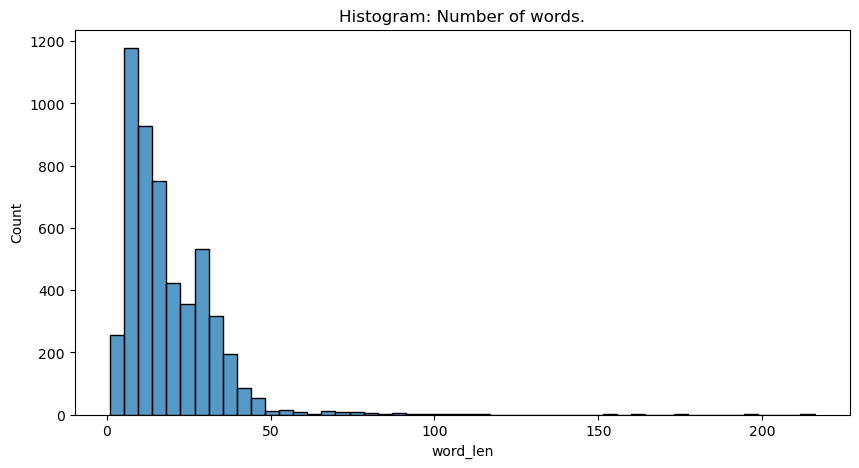

In [301]:
plt.figure(figsize=(10, 5))
plt.title('Histogram: Number of words.')
sns.histplot(df['word_len'], bins=50)
plt.show()

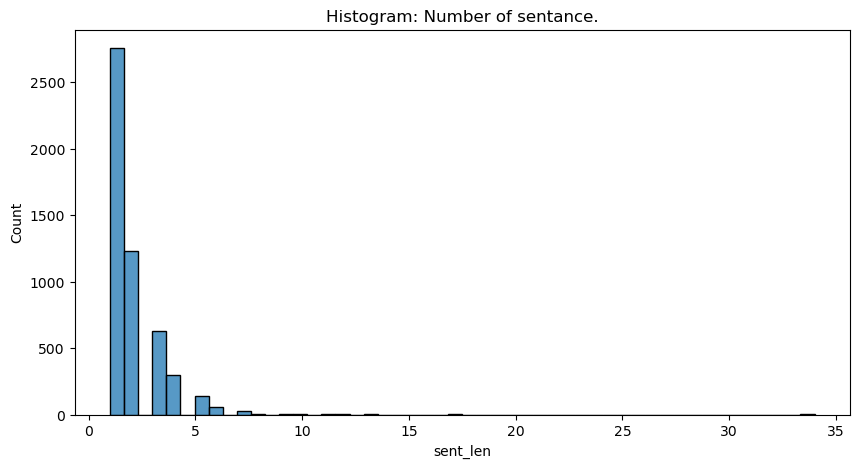

In [303]:

plt.figure(figsize=(10, 5))
plt.title('Histogram: Number of sentance.')
sns.histplot(df['sent_len'], bins= 50)
plt.show()

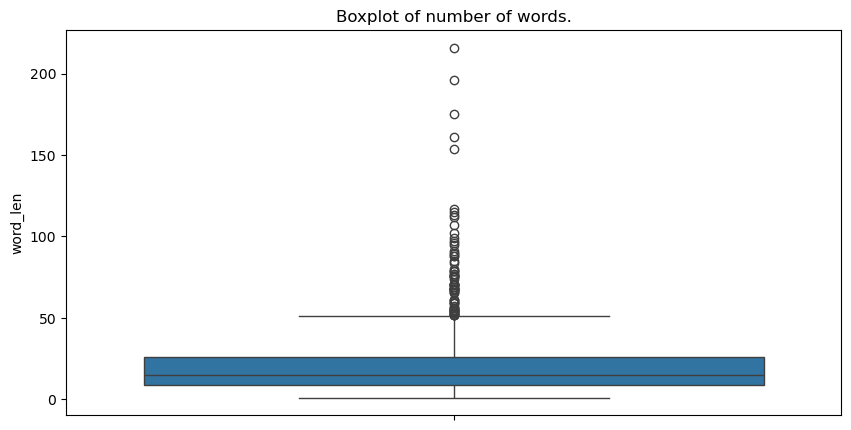

In [305]:
plt.figure(figsize=(10, 5))
plt.title('Boxplot of number of words.')
sns.boxplot(df['word_len'])
plt.show()

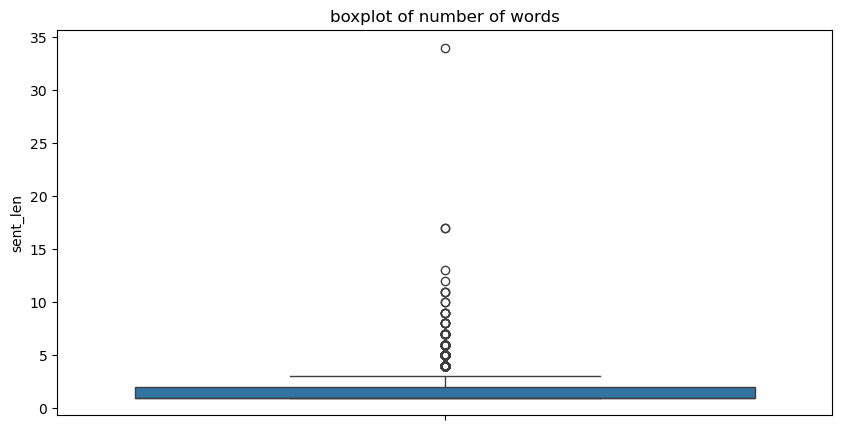

In [307]:
plt.figure(figsize=(10, 5))
plt.title('boxplot of number of words')
sns.boxplot(df['sent_len'])
plt.show()

In [309]:
df['Category'].value_counts().values

array([4516,  641], dtype=int64)

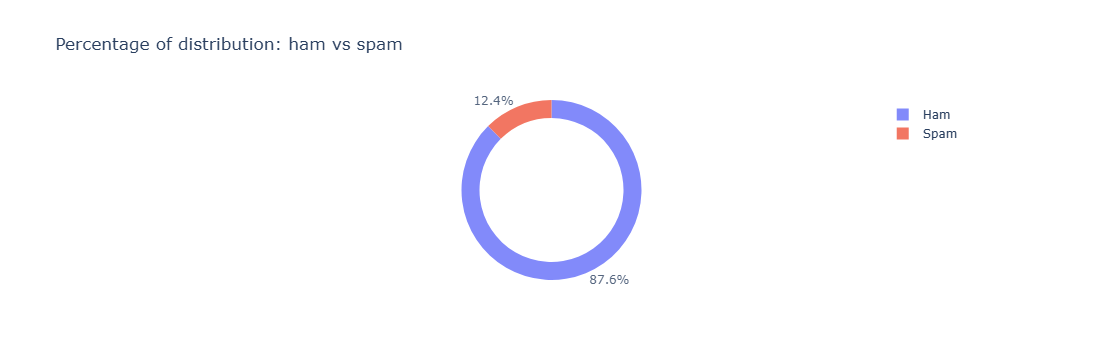

In [311]:
import plotly.express as plx
plx.pie(values=df['Category'].value_counts(),names= ['Ham', 'Spam'],title='Percentage of distribution: ham vs spam ', hole=0.8, opacity=0.8)


In [362]:
wnl = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_preprocess(text):
    text = wnl.lemmatize(text.lower())
    text = word_tokenize(text)
    # text = [word for word in text if word.isalnum() not in  and stop_words]
    text = [word for word in text if word.isalnum() and word not in stop_words]

    
    return ' '.join(text)


In [364]:
df['processed_msg'] = df['Message'].apply(lambda x: text_preprocess(str(x)))

In [365]:
df

,Category,Message,word_tk,sent_tk,word_len,sent_len,processed_msg
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...",24,1,go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],8,1,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,36,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,13,1,u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...",15,1,nah think goes usf lives around though
...,...,...,...,...,...,...,...
5152,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...",[this is the 2nd time we have tried 2 contact ...,35,4,2nd time tried 2 contact u pound prize 2 claim...
5153,ham,will ü b going to esplanade fr home?,"[will, ü, b, going, to, esplanade, fr, home, ?]",[will ü b going to esplanade fr home?],9,1,ü b going esplanade fr home
5154,ham,"pity, * was in mood for that. so...any other s...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, * was in mood for that., so...any other...",15,2,pity mood suggestions
5155,ham,the guy did some bitching but i acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,...",[the guy did some bitching but i acted like i'...,27,1,guy bitching acted like interested buying some...


In [370]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [372]:
vec = TfidfVectorizer()

In [376]:
df['Category'] =df['Category'].apply(lambda x: 1 if x=='ham' else 0)

In [378]:
df

,Category,Message,word_tk,sent_tk,word_len,sent_len,processed_msg
0,1,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...",24,1,go jurong point crazy available bugis n great ...
1,1,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],8,1,ok lar joking wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,36,1,free entry 2 wkly comp win fa cup final tkts 2...
3,1,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,13,1,u dun say early hor u c already say
4,1,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...",15,1,nah think goes usf lives around though
...,...,...,...,...,...,...,...
5152,0,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...",[this is the 2nd time we have tried 2 contact ...,35,4,2nd time tried 2 contact u pound prize 2 claim...
5153,1,will ü b going to esplanade fr home?,"[will, ü, b, going, to, esplanade, fr, home, ?]",[will ü b going to esplanade fr home?],9,1,ü b going esplanade fr home
5154,1,"pity, * was in mood for that. so...any other s...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, * was in mood for that., so...any other...",15,2,pity mood suggestions
5155,1,the guy did some bitching but i acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,...",[the guy did some bitching but i acted like i'...,27,1,guy bitching acted like interested buying some...


In [388]:
X = df[['processed_msg']]
y = df['Category']

In [414]:
X = vec.fit_transform(df['processed_msg'])

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [418]:
clf = RandomForestClassifier()

In [422]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [424]:
y_pred = clf.predict(X_test)

In [434]:
from sklearn.metrics import  accuracy_score, precision_score

In [430]:
accuracy_score(y_test, y_pred)

0.9786821705426356

In [432]:
precision_score(y_test, y_pred)

0.9781181619256017